# 1. Sigmoid function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
z = np.linspace(-10, 10, 100)
s = sigmoid(z)

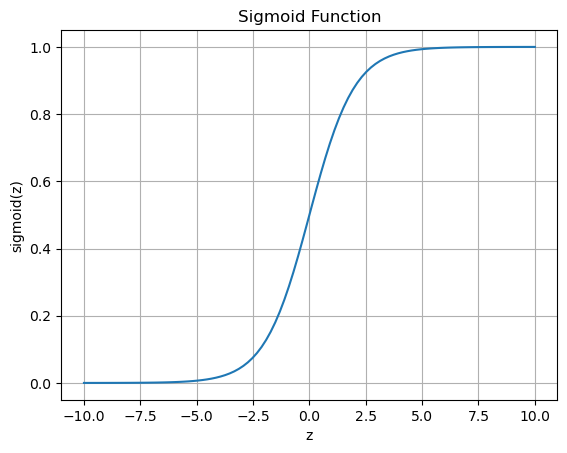

In [7]:
plt.plot(z, s)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

# 2. Binary Cross Entropy

In [14]:
def binary_cross_entropy(y, y_hat):
    epsilon = 1e-8 #avoid log(0)
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

# 3. Logistic Regression from scratch (Numpy)

## 📌 Logistic Regression — 核心推导

---

### 1️⃣ 线性输出 z

给定输入特征 \( x_i \)，权重向量 \( w \)，偏置 \( b \)：

\[
z_i = w^T x_i + b
\]

---

### 2️⃣ Sigmoid 激活函数

\[
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
\]

---

### 3️⃣ Binary Cross-Entropy Loss (最大似然)

对所有样本的损失函数：

\[
L(w, b) = -\frac{1}{N} \sum_{i=1}^N \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
\]

其中：
- \( y_i \in \{0, 1\} \)
- \( \hat{y}_i = P(y_i = 1 | x_i) \)

---

### 4️⃣ 梯度 (Key Insight)

- 对 z 的梯度：
\[
\frac{\partial L}{\partial z_i} = \hat{y}_i - y_i
\]

- 对 w：
\[
\frac{\partial L}{\partial w} = \frac{1}{N} X^T (\hat{y} - y)
\]

- 对 b：
\[
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i)
\]

---

### 📌 代码映射

| 数学 | 代码 |
|------|------|
| \( z = Xw + b \) | `z = X @ w + b` |
| \( \hat{y} = \sigma(z) \) | `y_hat = sigmoid(z)` |
| \( L \) | `binary_cross_entropy(y, y_hat)` |
| 梯度 | `dz = y_hat - y`<br>`dw = X.T @ dz / N`<br>`db = np.sum(dz) / N` |

---

✅ 这就是 Logistic Regression 核心推导 + 代码映射，Applied Scientist 面试必考闭环。


## 3.1 toy data

In [40]:
np.random.seed(42)
N = 10000
X = np.random.randn(N, 2) #generate (N, 2) shape normal distribution number N(0, 1)
w_true = np.array([2, -3])
b_true = 0.5

logits = X @ w_true + b_true
probs = sigmoid(logits)
y = (probs > 0.5).astype(int)

## 3.2 initial training parameter

In [61]:
w = np.zeros(2)
b = 0.

## 3.3 Gradient Descent

In [62]:
lr = 0.05
epochs = 1000
losses = []

for epoch in range(epochs):
    z = X @ w + b
    y_hat = sigmoid(z)

    loss = binary_cross_entropy(y, y_hat)
    losses.append(loss)

    #get gradient
    dz = y_hat - y
    dw = X.T @ dz / N
    db = np.sum(dz) / N

    #update w and b
    w -= lr * dw
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print(f"Trained weights: {w}, bias: {b}")
print(f"True weights: {w_true}, true bias: {b_true}")

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3654
Epoch 200: Loss = 0.2822
Epoch 300: Loss = 0.2415
Epoch 400: Loss = 0.2162
Epoch 500: Loss = 0.1985
Epoch 600: Loss = 0.1852
Epoch 700: Loss = 0.1747
Epoch 800: Loss = 0.1661
Epoch 900: Loss = 0.1590
Trained weights: [ 2.23767986 -3.31535941], bias: 0.5637142962422402
True weights: [ 2 -3], true bias: 0.5


## 3.4 Loss curve

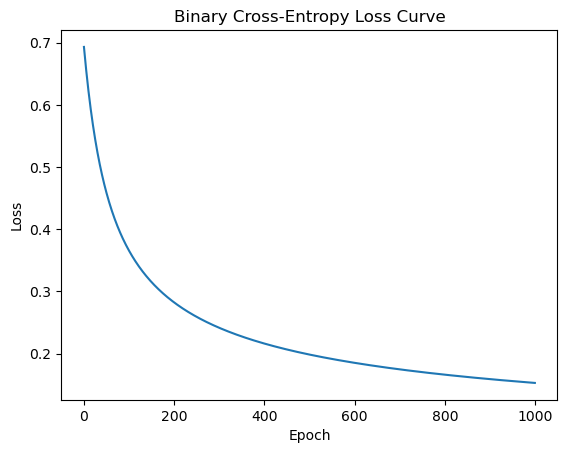

In [43]:
plt.plot(losses)
plt.title("Binary Cross-Entropy Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 4. Logistic regression with Pytorch

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

In [45]:
torch.manual_seed(42)

In [46]:
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32).unsqueeze(1) #shape (N,1)

## 4.1 define model

In [47]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1) #output is probability shape(N,1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    

In [48]:
model = LogisticRegression(input_dim=2)

## 4.2 define loss and optimizer

In [49]:
criterion = nn.BCELoss() #binary cross entropy
optimizer = optim.SGD(model.parameters(), lr=0.05)

## 4.3 train

In [51]:
epochs = 1000
losses = []

for epoch in range(epochs):
    #Forward pass
    y_pred = model(X_torch)

    #loss
    loss = criterion(y_pred, y_torch)
    losses.append(loss.item())

    #Backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch%100==0:
        print(f"Epoch {epoch:>4} | Loss: {loss.item():.4f}")


Epoch    0 | Loss: 0.8462
Epoch  100 | Loss: 0.3842
Epoch  200 | Loss: 0.2878
Epoch  300 | Loss: 0.2442
Epoch  400 | Loss: 0.2179
Epoch  500 | Loss: 0.1997
Epoch  600 | Loss: 0.1861
Epoch  700 | Loss: 0.1755
Epoch  800 | Loss: 0.1668
Epoch  900 | Loss: 0.1595


In [52]:
w_learned = model.linear.weight.data.numpy()
b_learned = model.linear.bias.data.numpy()

print(f"Trained weights: {w_learned}, bias: {b_learned}")
print(f"True weights: {w_true}, true bias: {b_true}")

Trained weights: [[ 2.2311876 -3.3033707]], bias: [0.5615649]
True weights: [ 2 -3], true bias: 0.5


## 4.4 Loss curve

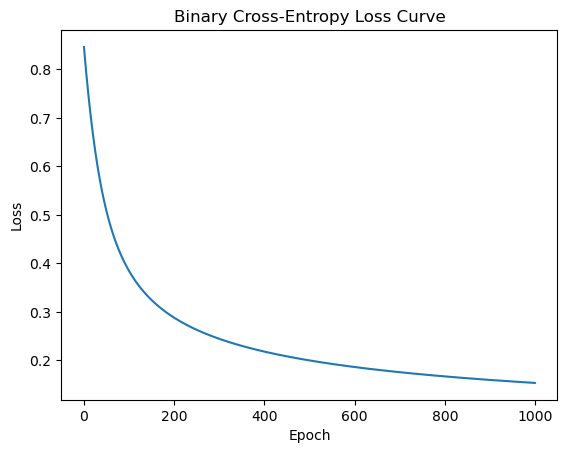

In [53]:
plt.plot(losses)
plt.title("Binary Cross-Entropy Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Logistic Regression with sklearn

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## 5.1 Sklearn model

In [63]:
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)

LogisticRegression()

## 5.2 the learned parameters

In [64]:
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf.coef_}")
print(f"intercept_: {clf.intercept_}")


✅ sklearn 学到的参数：
coef_: [[ 10.32744367 -15.46355059]]
intercept_: [2.6327741]


In [57]:
y_pred_prob = clf.predict_proba(X)[:, 1]
y_pred_label = clf.predict(X)

## 5.3 ACC AUC

In [58]:
acc = accuracy_score(y, y_pred_label)
auc = roc_auc_score(y, y_pred_prob)

In [59]:
print(f"\nAccuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.9993
AUC: 1.0000


## 5.4 ROC curve

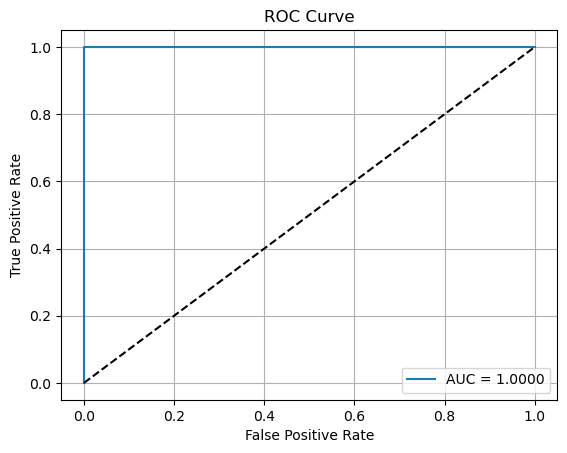

In [60]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

## 5.5 regularization

we can see that the weights get by sklearn is 5x that of pytorch or scratch from numpy, since the linear separable X@W + b= 0 

In [66]:
clf2 = LogisticRegression(penalty='l2', solver='lbfgs')
clf2.fit(X, y)
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf2.coef_}")
print(f"intercept_: {clf2.intercept_}")


✅ sklearn 学到的参数：
coef_: [[ 10.32744367 -15.46355059]]
intercept_: [2.6327741]


but regularization still 5x that weights...

In [67]:
clf_l2_strong = LogisticRegression(penalty='l2', C=0.1)
clf_l2_strong.fit(X, y)
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf_l2_strong.coef_}")
print(f"intercept_: {clf_l2_strong.intercept_}")


✅ sklearn 学到的参数：
coef_: [[ 4.74878194 -7.10337401]]
intercept_: [1.22876526]


In [68]:
clf_l2_strong = LogisticRegression(penalty='l2', C=0.2)
clf_l2_strong.fit(X, y)
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf_l2_strong.coef_}")
print(f"intercept_: {clf_l2_strong.intercept_}")


✅ sklearn 学到的参数：
coef_: [[ 6.00954163 -8.99405291]]
intercept_: [1.54354391]


In [69]:
clf_l2_strong = LogisticRegression(penalty='l2', C=0.5)
clf_l2_strong.fit(X, y)
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf_l2_strong.coef_}")
print(f"intercept_: {clf_l2_strong.intercept_}")


✅ sklearn 学到的参数：
coef_: [[  8.18910991 -12.26419869]]
intercept_: [2.09636527]


In [70]:
clf_l2_strong = LogisticRegression(penalty='l2', C=1)
clf_l2_strong.fit(X, y)
print("\n✅ sklearn 学到的参数：")
print(f"coef_: {clf_l2_strong.coef_}")
print(f"intercept_: {clf_l2_strong.intercept_}")


✅ sklearn 学到的参数：
coef_: [[ 10.32744367 -15.46355059]]
intercept_: [2.6327741]
